# Bank Marketing Dataset
# Content

 ####  Exploratory Data Analysis
 ####  Missing Values
 ####  Feature Selection
 ####  Dummy Values
 ####  Data Visualization
 ####  Feature Scalling and Balancing
 ####  Spliting data

##  Apply Classifiers
 ####  SVM
 ####  Navie Bayes
 ####  Decision Tree
 ####  ANN

## Comparison Table and Plot


##  Exploratory Data Analysis


In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# Data Visualization and Manipulation
import numpy as np
import pandas as pd
import random
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import TimeSeriesSplit
from pandas.plotting import scatter_matrix
from sklearn.externals.six import StringIO  
from scipy import optimize


# Preprocess
from sklearn.preprocessing import MinMaxScaler,StandardScaler,Imputer,LabelEncoder,OneHotEncoder

# Modeling Algos libraries
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.linear_model import LogisticRegression

# Evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score , accuracy_score, f1_score
from sklearn import metrics

C:\Users\Haris\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
# Load Dataset 
dataset = pd.read_csv("./bank-full.csv")
dataset.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
# Creating and Adding User Columns
dataset_user_col = pd.DataFrame(np.arange(0,len(dataset)), columns=['user'])
dataset = pd.concat([dataset_user_col, dataset], axis=1)

In [4]:
dataset.tail()

,user,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [5]:
# Dimension of Data 
dataset.shape

(45211, 18)

In [6]:
# To Check Duplicate Value 
dataset.duplicated().sum()

0

In [7]:
# Information about data ( Counts, Null values , Data Types)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
user         45211 non-null int32
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int32(1), int64(7), object(10)
memory usage: 6.0+ MB


In [8]:
# All Features Columns 
dataset.columns.values

array(['user', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y'], dtype=object)

In [9]:
# Statistical Distribution
# only numerical values displaying here
dataset.describe()

,user,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,22605.000000,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,13051.435847,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,0.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11302.500000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,22605.000000,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33907.500000,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45210.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [10]:
# Group Count by Target Feature ( shows only numerical values)
dataset.groupby('y').mean()

,user,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,,
no,21197.503081,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
yes,33228.953867,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


In [11]:
# Group Counts
dataset['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [12]:
# Target yes no Percentage Wise 
countNo = len(dataset[dataset.y == 'no'])
countYes = len(dataset[dataset.y == 'yes'])
print('Percentage of "No": {:.3f}%'. format((countNo/(len(dataset.y))*100)))
print('Percentage of "Yes": {:.3f}%'. format((countYes/(len(dataset.y))*100)))

Percentage of "No": 88.302%
Percentage of "Yes": 11.698%


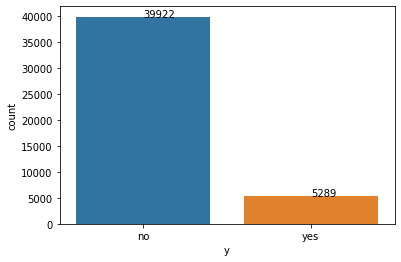

In [13]:
k=sns.countplot(dataset["y"])
for b in k.patches:
    k.annotate(format(b.get_height(),'.0f'),(b.get_x()+b.get_width() / 2.,b.get_height()))

## 1.2 Missing Values 

In [14]:
# Null values
dataset.isna().any()

user         False
age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [15]:
# Sum all null values of any 
dataset.isna().sum()

user         0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

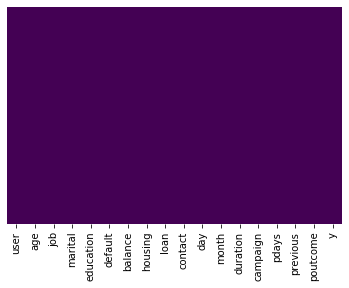

In [16]:
# Visualize Missing Values
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False, cmap='viridis')

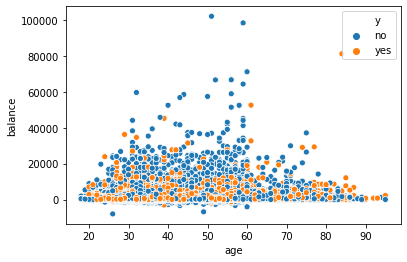

In [17]:
sns.scatterplot(x='age', y='balance',hue='y', data=dataset)

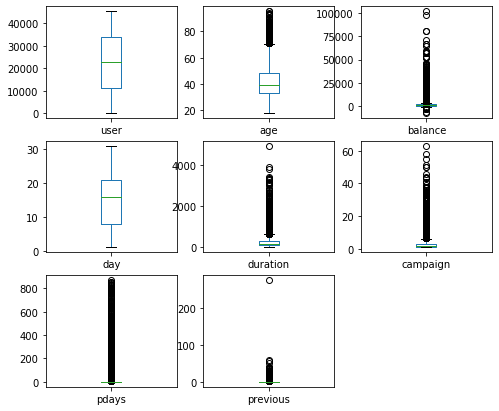

In [18]:
dataset.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(8, 7))
plt.show()

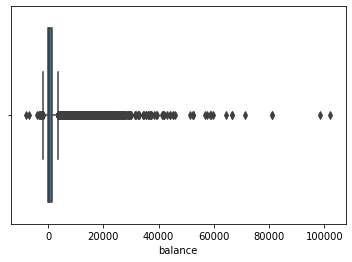

In [19]:
import seaborn as sns
sns.boxplot(x=dataset['balance'])

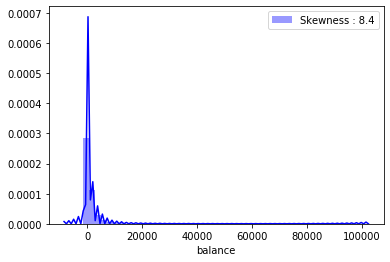

In [20]:
plot1 = sns.distplot(dataset["balance"], color="b", label="Skewness : %.1f"%(dataset["balance"].skew()))
plot1 = plot1.legend(loc="best")

### Define X and y

In [21]:
#Define X and y
X = dataset.drop(['y','user','job','marital', 'education', 'contact', 
             'housing', 'loan', 'day', 'month', 'poutcome' ], axis=1)
y = dataset['y']

### Get Dummy Values

In [22]:
X = pd.get_dummies(X)
y = pd.get_dummies(y)

In [23]:
dataset.columns.values


array(['user', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y'], dtype=object)

In [24]:
X.columns.values

array(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous',
       'default_no', 'default_yes'], dtype=object)

In [25]:
y.columns.values

array(['no', 'yes'], dtype=object)

In [26]:
X.columns
X = X.drop(['default_no'], axis= 1)
X = X.rename(columns = {'default_yes': 'default'})
y.columns
y = y.drop(['yes'], axis=1)
y = y.rename(columns= {'no': 'y'})

In [27]:
X.columns.values

array(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous',
       'default'], dtype=object)

In [28]:
y.columns.values

array(['y'], dtype=object)

# Data Visualization

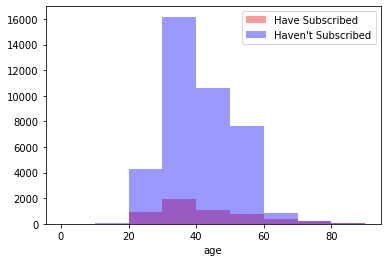

In [29]:
#Age group
bins = range(0, 100, 10)
ax = sns.distplot(dataset.age[dataset.y=='yes'],
              color='red', kde=False, bins=bins, label='Have Subscribed')
sns.distplot(dataset.age[dataset.y=='no'],
         ax=ax,  # Overplots on first plot
         color='blue', kde=False, bins=bins, label="Haven't Subscribed")
plt.legend()
plt.show()

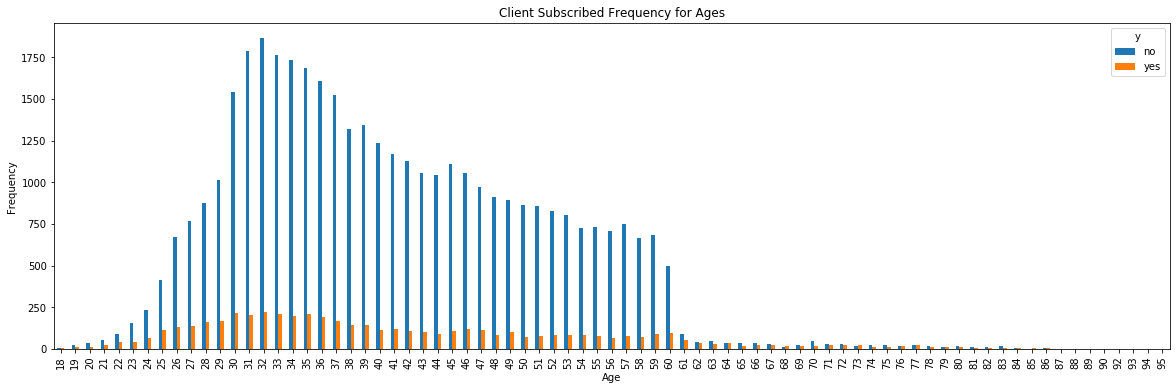

In [30]:
#Age
pd.crosstab(dataset.age,dataset.y).plot(kind="bar",figsize=(20,6))
plt.title('Client Subscribed Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


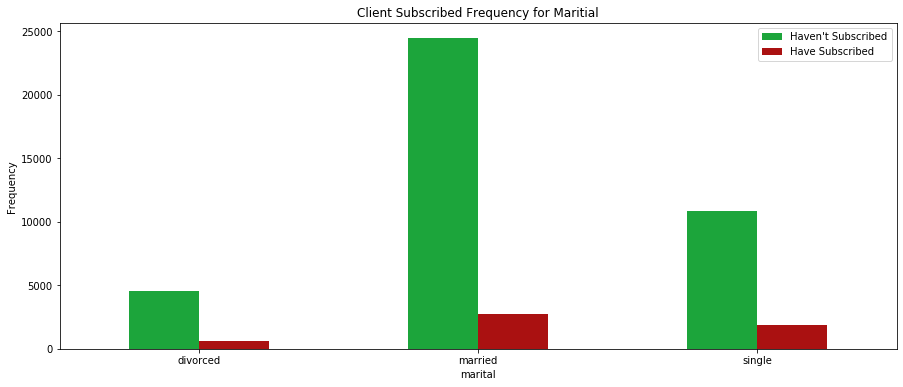

In [31]:
pd.crosstab(dataset.marital,dataset.y).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Client Subscribed Frequency for Maritial')
plt.xlabel('marital')
plt.xticks(rotation=0)
plt.legend(["Haven't Subscribed", "Have Subscribed"])
plt.ylabel('Frequency')
plt.show()

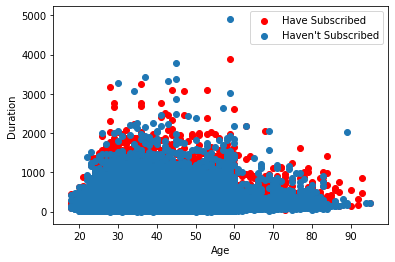

In [32]:
plt.scatter(x=dataset.age[dataset.y=='yes'], y=dataset.duration[(dataset.y=='yes')], c="red")
plt.scatter(x=dataset.age[dataset.y=='no'], y=dataset.duration[(dataset.y=='no')])
plt.legend(["Have Subscribed", "Haven't Subscribed"])
plt.xlabel("Age")
plt.ylabel("Duration")
plt.show()

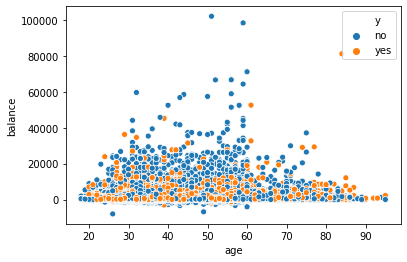

In [33]:
sns.scatterplot(x='age', y='balance',hue='y', data=dataset)

In [34]:
dataset.corr()

,user,age,balance,day,duration,campaign,pdays,previous
user,1.000000,0.014973,0.073639,-0.061465,0.013031,-0.102884,0.437729,0.271098
age,0.014973,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.073639,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.061465,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,0.013031,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,-0.102884,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,0.437729,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.271098,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


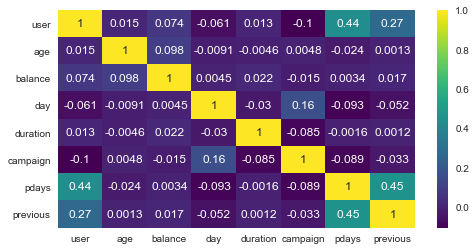

In [72]:
plt.figure(figsize=(8,4))
sns.heatmap(data=dataset.corr(), annot=True, cmap='viridis')

# Spliting Dataset
Training Set and Test Set

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [37]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(31647, 7) (13564, 7) (31647, 1) (13564, 1)


### Balancing

In [38]:
y_train['y'].value_counts()

1    27945
0     3702
Name: y, dtype: int64

In [39]:
import numpy as np
pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index

random.seed(0)
higher = np.random.choice(higher, size=len(lower))
lower = np.asarray(lower)
new_indexes = np.concatenate((lower, higher))

X_train = X_train.loc[new_indexes]
y_train = y_train.loc[new_indexes]

In [40]:
y_train['y'].value_counts()

1    3702
0    3702
Name: y, dtype: int64

# Features Scalling

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train2 = pd.DataFrame(sc.fit_transform(X_train))
X_test2 = pd.DataFrame(sc.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

In [42]:
X_train.columns.values

array(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous',
       'default'], dtype=object)

In [43]:
X_train2.columns.values

array(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous',
       'default'], dtype=object)

In [44]:
X_test.columns.values

array(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous',
       'default'], dtype=object)

In [45]:
X_train.head()

,age,balance,duration,campaign,pdays,previous,default
44456,-1.197323,-0.365213,0.003763,0.544912,-0.487141,-0.385646,-0.12337
44856,-1.280820,-0.155606,1.018342,-0.566222,-0.487141,-0.385646,-0.12337
31987,-0.529352,0.020711,0.065938,-0.566222,-0.487141,-0.385646,-0.12337
16811,-1.113827,-0.367370,1.235954,-0.195844,-0.487141,-0.385646,-0.12337
29849,-0.111870,-0.108136,0.944863,-0.195844,1.246469,0.548229,-0.12337


In [46]:
temp_list_accuracy=[]
temp_list_precision=[]
temp_list_recall=[]

In [47]:
def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])

# 1. Linear SVM

In [48]:
## SVM (Linear)
classifier_linear_svm = SVC(random_state = 0, kernel = 'linear',probability=True)
classifier_linear_svm.fit(X_train, y_train)

# Predicting Test Set
y_pred_linear_svm = classifier_linear_svm.predict(X_test)

# Calculating 
acc1 = accuracy_score(y_test, y_pred_linear_svm)
prec1 = precision_score(y_test, y_pred_linear_svm)
rec1 = recall_score(y_test, y_pred_linear_svm)

results = pd.DataFrame([['SVM (Linear)', acc1, prec1, rec1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall'])
#print(results)

print("Accuracy Score :",acc1 * 100)
print("PRECISION SCORE :",prec1)
print("RECALL SCORE :", rec1)
temp_list_accuracy.append(acc1)
temp_list_precision.append(prec1)
temp_list_recall.append(rec1)

Accuracy Score : 79.28339722795636
PRECISION SCORE : 0.9495831289847965
RECALL SCORE : 0.8082992402104032


### Precision Recall curve

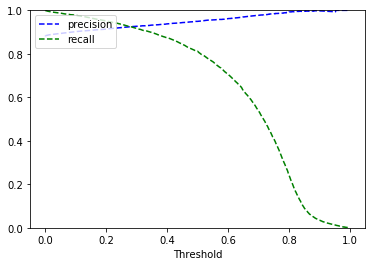

In [49]:
# example of a precision-recall curve for a predictive model
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot as plt
# predict probabilities
y_scores=classifier_linear_svm.predict_proba(X_test)
prec, rec, tre = precision_recall_curve(y_test, y_scores[:,1], )
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [50]:
#classification report
print(metrics.classification_report(y_test, y_pred_linear_svm))

              precision    recall  f1-score   support

           0       0.32      0.68      0.43      1587
           1       0.95      0.81      0.87     11977

    accuracy                           0.79     13564
   macro avg       0.63      0.74      0.65     13564
weighted avg       0.88      0.79      0.82     13564



[[1073  514]
 [2296 9681]]


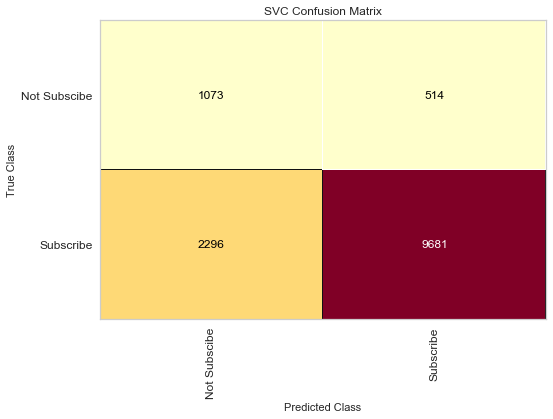

<Figure size 576x396 with 0 Axes>

In [51]:
# Confusion Matrix
conf_linear_svm = metrics.confusion_matrix(y_test, y_pred_linear_svm)
print(conf_linear_svm)

#Visualization of Confusion Matrix
from yellowbrick.classifier import confusion_matrix
confusion_matrix(
    SVC(random_state = 0, kernel = 'linear'),
    X_train, y_train, X_test, y_test,
    classes=['Not Subscibe', 'Subscribe']
)
plt.tight_layout()

# 2. Naive Bayes

In [52]:
## Naive Bayes
classifier_NB = GaussianNB()
classifier_NB.fit(X_train, y_train)

# Predicting Test Set
y_pred_NB = classifier_NB.predict(X_test)


acc2 = accuracy_score(y_test, y_pred_NB)
prec2 = precision_score(y_test, y_pred_NB)
rec2 = recall_score(y_test, y_pred_NB)



model_results_navie_bayes = pd.DataFrame([['Naive Bayes (Gaussian)', acc2, prec2, rec2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall',])

results = results.append(model_results_navie_bayes, ignore_index = True)
#print(model_results_navie_bayes)

print("Accuracy Score :",acc2 * 100)
print("PRECISION SCORE :",prec2)
print("RECALL SCORE :", rec2)
temp_list_accuracy.append(acc2)
temp_list_precision.append(prec2)
temp_list_recall.append(rec2)


Accuracy Score : 77.21910940725449
PRECISION SCORE : 0.9444833450035011
RECALL SCORE : 0.7883443266260333


### Precision Recall Curve


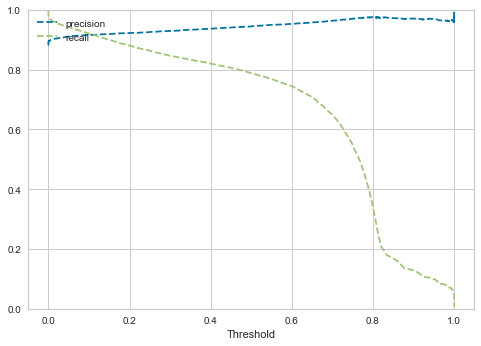

In [53]:
# example of a precision-recall curve for a predictive model
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot as plt
# predict probabilities
y_scores2=classifier_NB.predict_proba(X_test)
prec, rec, tre = precision_recall_curve(y_test, y_scores2[:,1], )
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

[[1032  555]
 [2535 9442]]


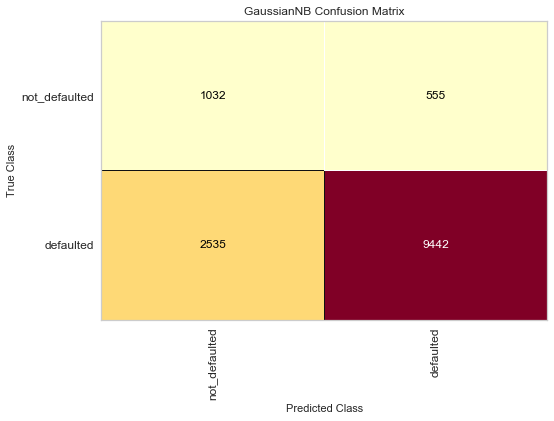

<Figure size 576x396 with 0 Axes>

In [54]:
# Confusion Matrix
conf_NB = metrics.confusion_matrix(y_test, y_pred_NB)
print(conf_NB)

# Instantiate the visualizer with the classification model
from yellowbrick.classifier import confusion_matrix
confusion_matrix(
    GaussianNB(),
    X_train, y_train, X_test, y_test,
    classes=['not_defaulted', 'defaulted']
)
plt.tight_layout()

# 3.Decision Tree

In [55]:
## Decision Tree
classifier_dt = DecisionTreeClassifier(criterion='gini', random_state=0)
classifier_dt.fit(X_train, y_train)

#Predicting the best set result
y_pred_dt = classifier_dt.predict(X_test)


acc3 = accuracy_score(y_test, y_pred_dt)
prec3 = precision_score(y_test, y_pred_dt)
rec3 = recall_score(y_test, y_pred_dt)

model_results_decision_tree = pd.DataFrame([['Decision Tree', acc3, prec3, rec3]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall'])

results = results.append(model_results_decision_tree, ignore_index = True)
#print(model_results_decision_tree)

print("Accuracy Score :",acc3 * 100)
print("PRECISION SCORE :",prec3)
print("RECALL SCORE :", rec3)
temp_list_accuracy.append(acc3)
temp_list_precision.append(prec3)
temp_list_recall.append(rec3)

Accuracy Score : 72.39015039811265
PRECISION SCORE : 0.9492468893254747
RECALL SCORE : 0.7261417717291475


### Precision Recall Curves

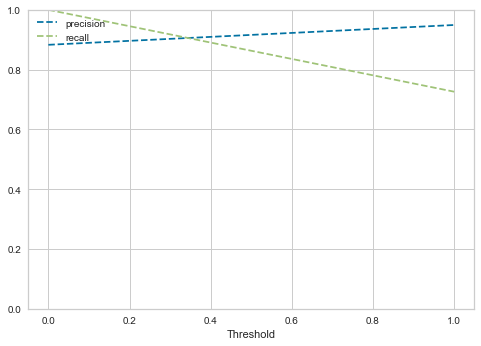

In [56]:
# example of a precision-recall curve for a predictive model
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot as plt
# predict probabilities
y_scores3=classifier_dt.predict_proba(X_test)
prec, rec, tre = precision_recall_curve(y_test, y_scores3[:,1], )
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

[[1122  465]
 [3280 8697]]


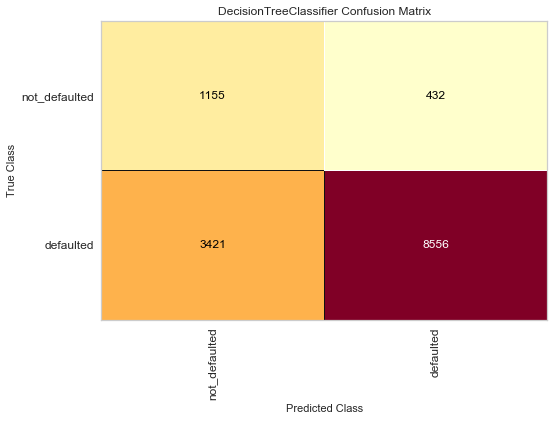

<Figure size 576x396 with 0 Axes>

In [57]:
# Confusion Matrix
conf_dt = metrics.confusion_matrix(y_test, y_pred_dt)
print(conf_dt)

# Instantiate the visualizer with the classification model
from yellowbrick.classifier import confusion_matrix
confusion_matrix(
    DecisionTreeClassifier(criterion='entropy', random_state=0),
    X_train, y_train, X_test, y_test,
    classes=['not_defaulted', 'defaulted']
)
plt.tight_layout()

# ANN

In [58]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense


#Building model
#model=keras.Sequential([keras.layers.Dense(units = 12, activation='relu',input_shape=( 7 ,)),
#                   keras.layers.Dense(units = 8,  activation = 'relu'),
#                       keras.layers.Dense(units = 1,  activation = 'sigmoid')
#                       ])

model=keras.Sequential([keras.layers.Dense(units = 12, activation='relu',input_shape=( 7 ,)),
                   keras.layers.Dense(units = 8,  activation = 'relu'),
                        keras.layers.Dense(units = 8,  activation = 'relu'),
                       keras.layers.Dense(units = 1,  activation = 'sigmoid')
                       ])
                      

#optimization
model.compile(optimizer='sgd', #Stochastic gradient descent optimizer.
              loss='binary_crossentropy', #Used for binary classification
              metrics=['accuracy'])

#Traing the model
hist = model.fit(X_train, y_train,
          batch_size=50, epochs=50, validation_split=0.2)

#Make a prediction & print the actual values
y_pred_ann = model.predict(X_test)
y_pred_ann  = [1 if y>=0.5 else 0 for y in y_pred_ann] #Threshold

acc4 = accuracy_score(y_test, y_pred_ann)
prec4 = precision_score(y_test, y_pred_ann)
rec4 = recall_score(y_test, y_pred_ann)

model_results_ann = pd.DataFrame([['ANN', acc4, prec4, rec4]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall'])

results = results.append(model_results_ann, ignore_index = True)
#print(model_results_ann)

print("Accuracy Score :",acc4 * 100)
print("PRECISION SCORE :",prec4)
print("RECALL SCORE :", rec4)
temp_list_accuracy.append(acc4)
temp_list_precision.append(prec4)
temp_list_recall.append(rec4)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Using TensorFlow backend.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 5923 samples, validate on 1481 samples
Epoch 1/50
5923/5923 [==============================] - 1s 153us/sample - loss: 0.6838 - acc: 0.6016 - val_loss: 0.7641 - val_acc: 0.0331
Epoch 2/50
5923/5923 [==============================] - 0s 47us/sample - loss: 0.6691 - acc: 0.6259 - val_loss: 0.8226 - val_acc: 0.0122
Epoch 3/50
5923/5923 [==============================] - 0s 48us/sample - loss: 0.6609 - acc: 0.6267 - val_loss: 0.8651 - val_acc: 0.0068
Epoch 4/50
5923/5923 [==============================] - 0s 55us/sample - loss: 0.6557 - acc: 0.6269 - val_loss: 0.8922 - val_acc: 0.0068
Epoch 5/50
5923/5923 [==============================] - 0s 42us/sample - loss: 0.6516 - acc: 0.6277 - val_loss: 0.9116 - val_acc: 0.0081
Epoch 6/50
5923/5923 [==============================] - 0s 55us/sample - loss: 0.6477 - acc: 0.6279 - val_loss: 0.9231 - val_acc: 0.0115
Epoch 7/50
5923/5923 [=============

### Precision Recall Curve

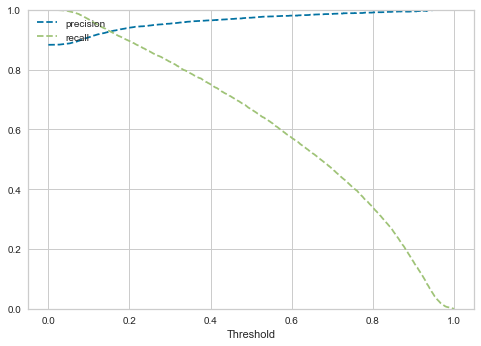

In [59]:
# example of a precision-recall curve for a predictive model
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot as plt
# predict probabilities
y_scores4=model.predict_proba(X_test)
prec, rec, tre = precision_recall_curve(y_test, y_scores4[:,0], )
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [60]:
y_scores4

array([[0.76067907],
       [0.13336292],
       [0.83326364],
       ...,
       [0.23689494],
       [0.51045585],
       [0.9590273 ]], dtype=float32)

In [61]:
# Print result table
results

,Model,Accuracy,Precision,Recall
0,SVM (Linear),0.792834,0.949583,0.808299
1,Naive Bayes (Gaussian),0.772191,0.944483,0.788344
2,Decision Tree,0.723902,0.949247,0.726142
3,ANN,0.690062,0.973675,0.667028


In [62]:
def convert(list): 
    return tuple(list) 

In [63]:
temp_list_accuracy= convert(temp_list_accuracy)
temp_list_precision= convert(temp_list_precision)
temp_list_recall= convert(temp_list_recall)

In [64]:
print(temp_list_accuracy)
print(temp_list_precision)
print(temp_list_recall)

(0.7928339722795635, 0.7721910940725449, 0.7239015039811265, 0.690061928634621)
(0.9495831289847965, 0.9444833450035011, 0.9492468893254747, 0.9736745886654479)
(0.8082992402104032, 0.7883443266260333, 0.7261417717291475, 0.6670284712365367)


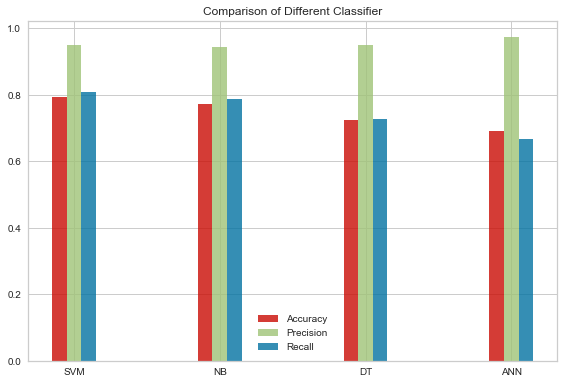

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 4
precision_tuple =temp_list_accuracy
accuracy_tuple = temp_list_precision 
recall_tuple = temp_list_recall

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.1
opacity = 0.8

rects1 = plt.bar(index, precision_tuple, bar_width, alpha=opacity, color='r',label='Accuracy')
rects2 = plt.bar(index + bar_width, accuracy_tuple, bar_width, alpha=opacity, color='g',label='Precision')
rects3 = plt.bar(index + bar_width+bar_width, recall_tuple, bar_width,alpha=opacity,color='b',label='Recall')


plt.title('Comparison of Different Classifier')
plt.xticks(index + bar_width, ('SVM', 'NB', 'DT', 'ANN'))
plt.legend()

plt.tight_layout()
plt.show()

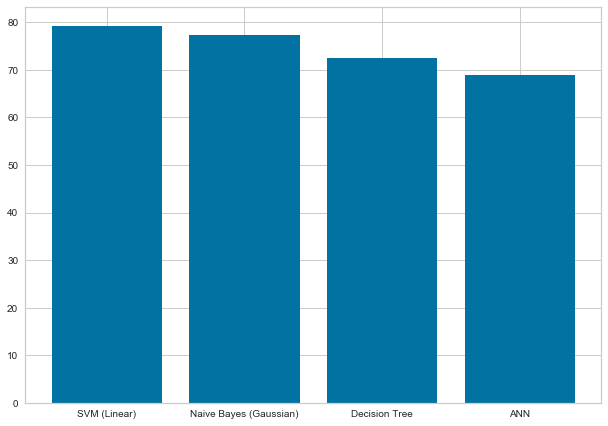

ValueError: Could not interpret input 'vertical'

In [66]:
# Comparison plot
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
horizontal = results['Model']
vertical = results['Accuracy'] * 100
ax.bar(horizontal,vertical)
plt.show()
sns.barplot(y='horizontal',x='vertical')